In [13]:
import numpy as np


    

In [18]:
np.arange(1,4)

array([1, 2, 3])

In [20]:
np.array([[1,0],[0,2],
[0,0]])

array([[1, 0],
       [0, 2],
       [0, 0]])

In [33]:
a = np.array([1.5,2,3])
b = np.array([[1,2,3],[4,5,6]])
c = a*b
d = np.multiply(a,b)
e = np.matmul(a,b.T)
# f = np.matmul(a.T,b)
g = np.matmul(a.T,b.T)
print('c = \n',c)
print('d = \n',d)
print('e = \n',e)
print('g = \n',g)

c = 
 [[ 1.5  4.   9. ]
 [ 6.  10.  18. ]]
d = 
 [[ 1.5  4.   9. ]
 [ 6.  10.  18. ]]
e = 
 [14.5 34. ]
g = 
 [14.5 34. ]


In [43]:
sum(a)

6.5

In [45]:
sum(a * 1.5 +1.5)

14.25

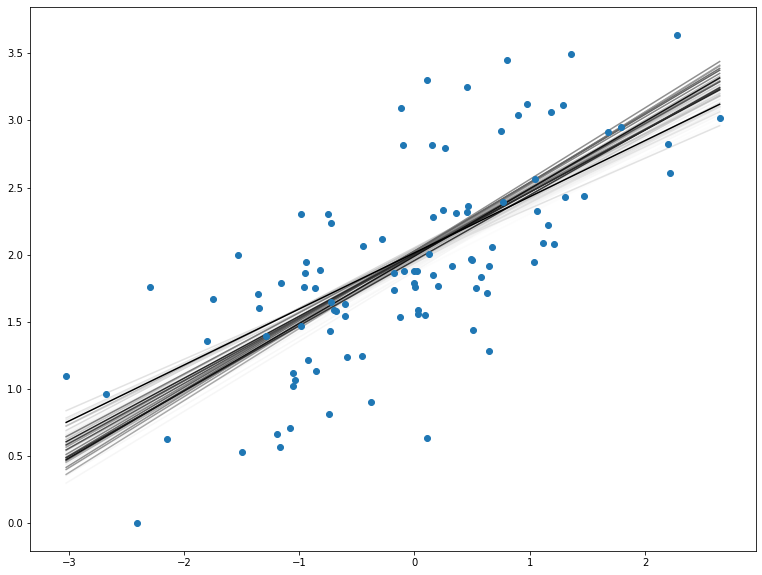

0.4179331388263457 2.013309774274984


In [115]:
import numpy as np
# Setting a random seed, feel free to change it and see different solutions.
np.random.seed(42)
np.random.seed(43)

# W = 1
# b = 1

# TODO: Fill in code in the function below to implement a gradient descent
# step for linear regression, following a squared error rule. See the docstring
# for parameters and returned variables.
def MSEStep(X, y, W, b, learn_rate = 0.1):
    """
    This function implements the gradient descent step for squared error as a
    performance metric.
    
    Parameters
    X : array of predictor features
    y : array of outcome values
    W : predictor feature coefficients
    b : regression function intercept
    learn_rate : learning rate

    Returns
    W_new : predictor feature coefficients following gradient descent step
    b_new : intercept following gradient descent step
    """
    
    #---STEP 0: Examine NP ndarray theory


    
    #---STEP 1: Examine Theory    

    #     Error = 1/2 * (y - y_hat)^2
    #     del/(del w1) (Error) = -(y - y_hat)x
    #     del/(del w2) (Error) = -(y - y_hat)

    #     wi --> wi - alpha * (del Error)/(del w1)
    #     w1 --> w1 - alpha * (-(y - y_hat)x)
    #     w2 --> w2 - alpha * (-(y - y_hat))

    #---STEP 2: Outline scalar solution 
    
    y_hat = W * X.T + b
    dist  = y - y_hat
    
    W_new = W - learn_rate * np.mean((-dist) * X.T)
    
    b_new = b - learn_rate * np.mean((-dist))
    
#     print('iteration ',_)
#     print('X = \n',X.T)
#     print('dist = \n',dist)
    

#     SOLUTION FEEDBACK
#     X given as colum-format, and distance defaults to row-format.
#     This works nicely for np.matmul mean/aggregation function, but is..
#     ..useless to in multilplication without transposing (it ..
#     ..produced incorrect and silent version of multiplication so would not converge).
#     
#     I liked the simplicity of normal multiplication, therefore I chose to transpose..
#     ..to only use row-formated arrays.  
# 
#     Also solution was way too fussy, I got within about 2% of answer's suggested coefficients, 
#     with nice convergence behaviour. I couldn't get closer.
    
    # Fill in code
    
    return W_new, b_new


# The parts of the script below will be run when you press the "Test Run"
# button. The gradient descent step will be performed multiple times on
# the provided dataset, and the returned list of regression coefficients
# will be plotted.
def miniBatchGD(X, y, batch_size = 35, learn_rate = 0.3,num_iter = 300):
    """
    This function performs mini-batch gradient descent on a given dataset.

    Parameters
    X : array of predictor features
    y : array of outcome values
    batch_size : how many data points will be sampled for each iteration
    learn_rate : learning rate
    num_iter : number of batches used

    Returns
    regression_coef : array of slopes and intercepts generated by gradient
      descent procedure
    """
    n_points = X.shape[0]
    W = np.zeros(X.shape[1]) # coefficients
    b = 0 # intercept
    
    # run iterations
    regression_coef = [np.hstack((W,b))]
    for _ in range(num_iter):
        batch = np.random.choice(range(n_points), batch_size)
        X_batch = X[batch,:]
        y_batch = y[batch]
        W, b = MSEStep(X_batch, y_batch, W, b, learn_rate)
        regression_coef.append(np.hstack((W,b)))
    
    return regression_coef


if __name__ == "__main__":
    # perform gradient descent
    data = np.loadtxt('data.csv', delimiter = ',')
    X = data[:,:-1]
    y = data[:,-1]
    regression_coef = miniBatchGD(X, y)
    
    # plot the results
    import matplotlib.pyplot as plt
    plt.rcParams['figure.figsize'] = [13, 10]
    
    plt.figure()
    X_min = X.min()
    X_max = X.max()
    counter = len(regression_coef)
    for W, b in regression_coef:
        counter -= 1
        color = [1 - 0.92 ** counter for _ in range(3)]
        plt.plot([X_min, X_max],[X_min * W + b, X_max * W + b], color = color)
    plt.scatter(X, y, zorder = 3)
    plt.show()
    

# print(regression_coef)
# u = np.concatenate(regression_coef).ravel().reshape([-1,2])
# plt.plot(u)
print(W,b)